# Primes
## finding primes

In [1]:
def get_primes(max : int):
    primes = set()
    for i in range(2, max):
        is_prime = True
        for j in range(2, i):
            if i % j == 0:
                is_prime = False
                break
        if is_prime:
            primes.add(i)
    return list(primes)

print(get_primes(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


## Timing my function

In [2]:
%timeit get_primes(10_000)

285 ms ± 2.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Sea level rise
## reading the data

In [3]:
import pandas as pd
import seaborn as sns
sns.set_theme()

sea_level_data = pd.read_csv('data/SeaLevel.txt', header=None, names=['time_y', 'sea_level_mm'], sep=r'\s+')

display(sea_level_data.head())

,time_y,sea_level_mm
0,1993.011526,-37.90
1,1993.038692,-40.94
2,1993.065858,-41.07
3,1993.093025,-43.36
4,1993.120191,-38.63


## line and parabola fit onto the entire data

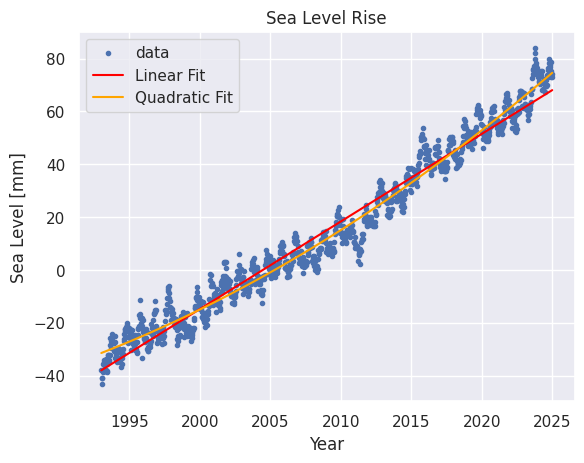

In [4]:
import numpy as np
import matplotlib.pyplot as plt

linear_coeffs= np.polyfit(sea_level_data['time_y'], sea_level_data['sea_level_mm'], 1)
quad_coeffs= np.polyfit(sea_level_data['time_y'], sea_level_data['sea_level_mm'], 2)

time = np.linspace(sea_level_data['time_y'].min(), sea_level_data['time_y'].max(), 100)
line_fit = np.polyval(linear_coeffs, time)
parabola_fit = np.polyval(quad_coeffs, time)

plt.title('Sea Level Rise')
plt.xlabel('Year')
plt.ylabel('Sea Level [mm]')
plt.scatter(sea_level_data['time_y'], sea_level_data['sea_level_mm'], marker= '.', label = 'data')
plt.plot(time, line_fit, color='red', label = 'Linear Fit')
plt.plot(time, parabola_fit, color='orange', label = 'Quadratic Fit')
plt.legend()
plt.show()


# spliting the data and computing the linear regressions

In [5]:
intervall_1 = sea_level_data[(sea_level_data['time_y'] >= 1993) & (sea_level_data['time_y'] < 2000)]
intervall_2 = sea_level_data[(sea_level_data['time_y'] >= 2000) & (sea_level_data['time_y'] < 2024)]

coeffs_1 = np.polyfit(intervall_1['time_y'], intervall_1['sea_level_mm'], 1)
coeffs_2 = np.polyfit(intervall_2['time_y'], intervall_2['sea_level_mm'], 1)

## Making a nice figure

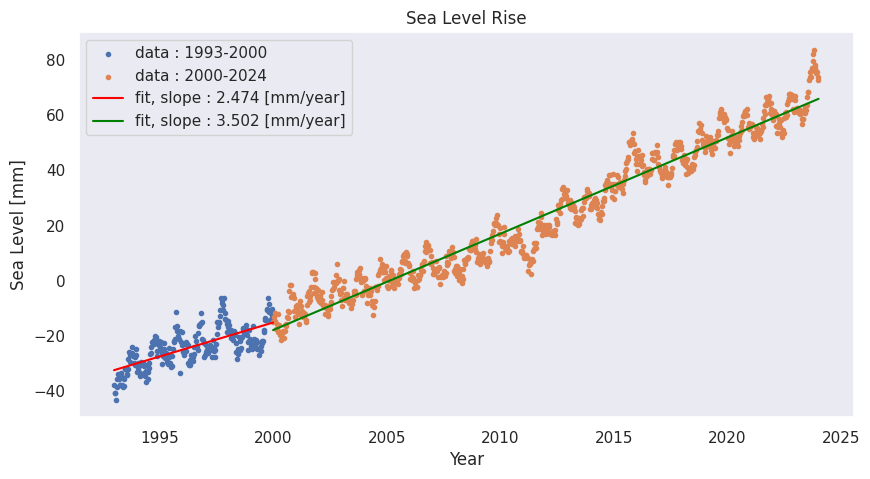

In [6]:
time_1 = np.linspace(1993, 2000, 100)
time_2 = np.linspace(2000, 2024, 100)

plt.figure(figsize=(10, 5))
plt.title('Sea Level Rise')
plt.xlabel('Year')
plt.ylabel('Sea Level [mm]')

plt.scatter(intervall_1['time_y'], intervall_1['sea_level_mm'], marker= '.', label='data : 1993-2000')
plt.scatter(intervall_2['time_y'], intervall_2['sea_level_mm'], marker= '.', label='data : 2000-2024')
plt.plot(time_1, np.polyval(coeffs_1, time_1), color='red', label=f'fit, slope : {coeffs_1[0]:.3f} [mm/year]')
plt.plot(time_2, np.polyval(coeffs_2, time_2), color='green', label=f'fit, slope : {coeffs_2[0]:.3f} [mm/year]')
plt.grid()
plt.legend()

plt.savefig('out/sea_level_rise.png')
plt.show()

## Diffrence between mean of time and 0-th order fit

The coefficient that is generated by the 0th order is the parameter $\hat{y}_0$ that minimizes
$$
\sum_{i=1}^N (y^{(i)} - \hat{y}_0)^2
$$
this can be solved for
$$
\hat{y}_0 = \frac{1}{N} \sum_{i=1}^N y^{(i)} = \operatorname{avg}_i (y^{(i)})
$$
While the mean along the time series is the average of the "other axis", i.e.
$$
\operatorname{avg}_i (x^{(i)})
$$

In [7]:
coef = np.polyfit(sea_level_data['time_y'], sea_level_data['sea_level_mm'], 0)
mean_of_time = np.mean(sea_level_data['time_y'])
print(coef[0], '[mm]')
print(mean_of_time, '[year]')

15.03724108658744 [mm]
2009.0042768022072 [year]


## Quadratic coefficients including units

In [8]:
# we can resuse the quad_coeffs from the previous exercise

print(f'Coefficients: {quad_coeffs}')
print(f'coeffs[2]: {quad_coeffs[2]:.3f} [mm]')
print(f'coeffs[1]: {quad_coeffs[1]:.3f} [mm/year]')
print(f'coeffs[0]: {quad_coeffs[0]:.3f} [mm/year^2]')

Coefficients: [ 3.85267621e-02 -1.51483490e+02  1.48844931e+05]
coeffs[2]: 148844.931 [mm]
coeffs[1]: -151.483 [mm/year]
coeffs[0]: 0.039 [mm/year^2]


# Shifted Quadratic fit

The coefficients change because `polyfit` simply tries to mach a polynomial of the form $y = ax^2 + bx + c$ to our data $\{x^{(i)}, y^{(i)}\}$. If we shift the $x$-Values the coefficients obviously change too. We can compute the new coefficents from the old ones when we concider what happens when we try to shift a $2$-order polynomial by an amount of $x_0$ to the left
$$
y = a(x+x_0)^2 + b(x+x_0) + c' = \underbrace{a}_{a'}x^2 + \underbrace{(b+2ax_0)}_{b'}x + \underbrace{(c + bx_0 + ax_0^2)}_{c'}
$$

In [9]:
x_0 = sea_level_data['time_y'].min()

new_quad_coeffs = np.polyfit(sea_level_data['time_y']-x_0, sea_level_data['sea_level_mm'], 2)

new_quad_coeffs_via_formula = np.zeros_like(quad_coeffs)
new_quad_coeffs_via_formula[0] = quad_coeffs[0]
new_quad_coeffs_via_formula[1] = quad_coeffs[1] + 2 * quad_coeffs[0] * x_0
new_quad_coeffs_via_formula[2] = quad_coeffs[2] + quad_coeffs[1] * x_0 + quad_coeffs[0] * x_0 ** 2

# check if the results are the same
assert np.allclose(new_quad_coeffs, new_quad_coeffs_via_formula)

print(f'Coefficients: {new_quad_coeffs}')
print(f'coeffs[2]: {new_quad_coeffs[2]:.3f} [mm]')
print(f'coeffs[1]: {new_quad_coeffs[1]:.3f} [mm/year]')
print(f'coeffs[0]: {new_quad_coeffs[0]:.3f} [mm/year^2]')

Coefficients: [  0.03852676   2.08507169 -31.45442168]
coeffs[2]: -31.454 [mm]
coeffs[1]: 2.085 [mm/year]
coeffs[0]: 0.039 [mm/year^2]
